It is a classification model to predict price range of mobile

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data=pd.read_csv("/content/drive/MyDrive/CSE422/Project/loan_data - loan_data.csv")
data.head(5) #Default 5 values

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,date_of_birth,guadrian_name
0,22,female,Master,71948.0,0.0,RENT,35000.0,PERSONAL,16.02,0.49,3,561.0,No,1,NaN,NaN
1,21,female,High School,12282.0,0.0,OWN,1000.0,EDUCATION,11.14,0.08,2,504.0,Yes,0,NaN,NaN
2,25,female,High School,12438.0,3.0,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3,635.0,No,1,NaN,NaN
3,23,female,Bachelor,79753.0,0.0,RENT,35000.0,MEDICAL,15.23,0.44,2,675.0,No,1,NaN,NaN
4,24,male,Master,66135.0,1.0,RENT,35000.0,MEDICAL,NaN,0.53,4,586.0,No,1,NaN,NaN


In [ ]:
data.shape

(45000, 16)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  int64  
 1   person_gender                   45000 non-null  object 
 2   person_education                44998 non-null  object 
 3   person_income                   44969 non-null  float64
 4   person_emp_exp                  44999 non-null  float64
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       44988 non-null  float64
 7   loan_intent                     44998 non-null  object 
 8   loan_int_rate                   44947 non-null  float64
 9   loan_percent_income             44998 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  int64  
 11  credit_score                    44999 non-null  float64
 12  previous_loan_defaults_on_file  

In [ ]:
data['person_education'].value_counts()

,count
person_education,
Bachelor,13398
Associate,12028
High School,11971
Master,6980
Doctorate,621


In [ ]:
data.isnull().sum()

,0
person_age,0
person_gender,0
person_education,2
person_income,31
person_emp_exp,1
person_home_ownership,0
loan_amnt,12
loan_intent,2
loan_int_rate,53
loan_percent_income,2


Drop Colums and imputing Missing values

In [ ]:

data = data.drop(columns=['date_of_birth', 'guadrian_name'])

numerical_columns = ['person_income', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']
categorical_columns = ['loan_intent']


num_imputer = SimpleImputer(strategy='median')
data[numerical_columns] = num_imputer.fit_transform(data[numerical_columns])

cat_imputer = SimpleImputer(strategy='most_frequent')
data[categorical_columns] = cat_imputer.fit_transform(data[categorical_columns])


data = data.dropna(subset=['person_emp_exp', 'person_education'])


print(data.isnull().sum())


person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64


In [ ]:
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
Index: 44997 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      44997 non-null  int64  
 1   person_gender                   44997 non-null  object 
 2   person_education                44997 non-null  object 
 3   person_income                   44997 non-null  float64
 4   person_emp_exp                  44997 non-null  float64
 5   person_home_ownership           44997 non-null  object 
 6   loan_amnt                       44997 non-null  float64
 7   loan_intent                     44997 non-null  object 
 8   loan_int_rate                   44997 non-null  float64
 9   loan_percent_income             44997 non-null  float64
 10  cb_person_cred_hist_length      44997 non-null  float64
 11  credit_score                    44997 non-null  float64
 12  previous_loan_defaults_on_file  44997

(44997, 14)

Feature Engineering

In [ ]:
data['person_education'].unique()


array(['Master', 'High School', 'Bachelor', 'Associate', 'Doctorate'],
      dtype=object)

In [ ]:
data['loan_intent'].unique()

array(['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT',
       'DEBTCONSOLIDATION'], dtype=object)

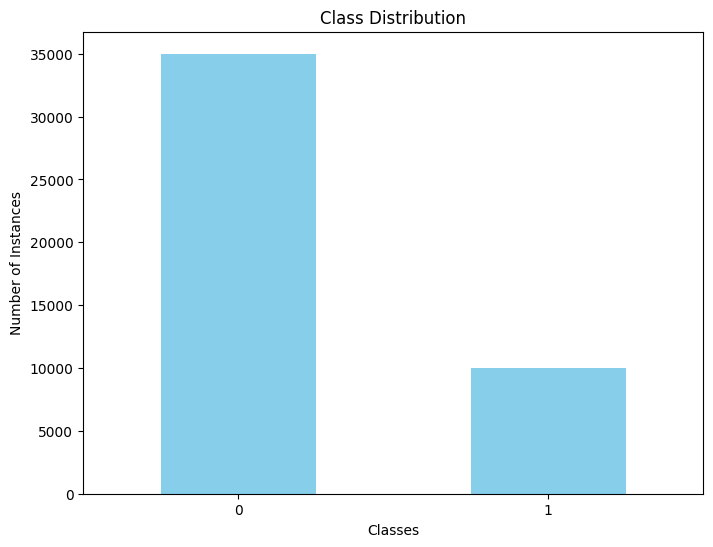

In [ ]:

df = pd.DataFrame(data)

class_counts = df['loan_status'].value_counts()

# Step 3: Plot the bar chart
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color='skyblue')
plt.title('Class Distribution')
plt.xlabel('Classes')
plt.ylabel('Number of Instances')
plt.xticks(rotation=0)
plt.show()


Encoding Categorical Values

Label Encoding

In [ ]:

encode = LabelEncoder()

data['person_gender'] = encode.fit_transform(data['person_gender'])
data['previous_loan_defaults_on_file'] = encode.fit_transform(data['previous_loan_defaults_on_file'])



Label Encoding (Using map function)

In [ ]:
data['person_education'] = data['person_education'].map({'High School':0,'Bachelor':1,'Master':2,'Very High':3, 'Associate':4, 'Doctorate':5 })
data.shape
print(data['person_education'].head(10))

0    2
1    0
2    0
3    1
4    2
5    0
6    1
7    0
8    4
9    0
Name: person_education, dtype: int64


In [ ]:
enc = LabelEncoder()
data['person_home_ownership'] = enc.fit_transform(data['person_home_ownership'])
data['loan_intent'] = enc.fit_transform(data['loan_intent'])

In [ ]:
data.head()


,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22,0,2,71948.0,0.0,3,35000.0,4,16.02,0.49,3.0,561.0,0,1
1,21,0,0,12282.0,0.0,2,1000.0,1,11.14,0.08,2.0,504.0,1,0
2,25,0,0,12438.0,3.0,0,5500.0,3,12.87,0.44,3.0,635.0,0,1
3,23,0,1,79753.0,0.0,3,35000.0,3,15.23,0.44,2.0,675.0,0,1
4,24,1,2,66135.0,1.0,3,35000.0,3,11.01,0.53,4.0,586.0,0,1


In [ ]:
data.shape

(44997, 14)

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

numerical_features = ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']
data1=data.copy()
data2=data.copy()
# Standard Scaling
scaler = StandardScaler()
data1[numerical_features] = scaler.fit_transform(data1[numerical_features])

#  Min-Max Scaling
minmax_scaler = MinMaxScaler()
data2[numerical_features] = minmax_scaler.fit_transform(data2[numerical_features])

print(data1.head())
print(data2.head())

# Creating new features
data1['affordability_index'] = data1['person_income'] / data1['loan_amnt']
data1['debt_ratio'] = data1['loan_amnt'] / (data1['credit_score'] + 1)
data1['emp_to_age_ratio'] = data1['person_emp_exp'] / (data1['person_age'] + 1)

print(data1[['affordability_index', 'debt_ratio', 'emp_to_age_ratio']].head())

data2['affordability_index'] = data2['person_income'] / data2['loan_amnt']
data2['debt_ratio'] = data2['loan_amnt'] / (data2['credit_score'] + 1)
data2['emp_to_age_ratio'] = data2['person_emp_exp'] / (data2['person_age'] + 1)

print(data2[['affordability_index', 'debt_ratio', 'emp_to_age_ratio']].head())
data1.drop(['loan_amnt', 'credit_score', 'person_income', 'person_age', 'person_emp_exp'], axis=1, inplace=True)


   person_age  person_gender  person_education  person_income  person_emp_exp  \
0   -0.953555              0                 2      -0.104100       -0.892314   
1   -1.118976              0                 0      -0.846060       -0.892314   
2   -0.457291              0                 0      -0.844120       -0.397556   
3   -0.788134              0                 1      -0.007043       -0.892314   
4   -0.622712              1                 2      -0.176386       -0.727394   

   person_home_ownership  loan_amnt  loan_intent  loan_int_rate  \
0                      3   4.026193            4       1.685193   
1                      2  -1.359404            1       0.045717   
2                      0  -0.646604            3       0.626925   
3                      3   4.026193            3       1.419786   
4                      3   4.026193            3       0.002042   

   loan_percent_income  cb_person_cred_hist_length  credit_score  \
0             4.016532                   -

Feature Selection

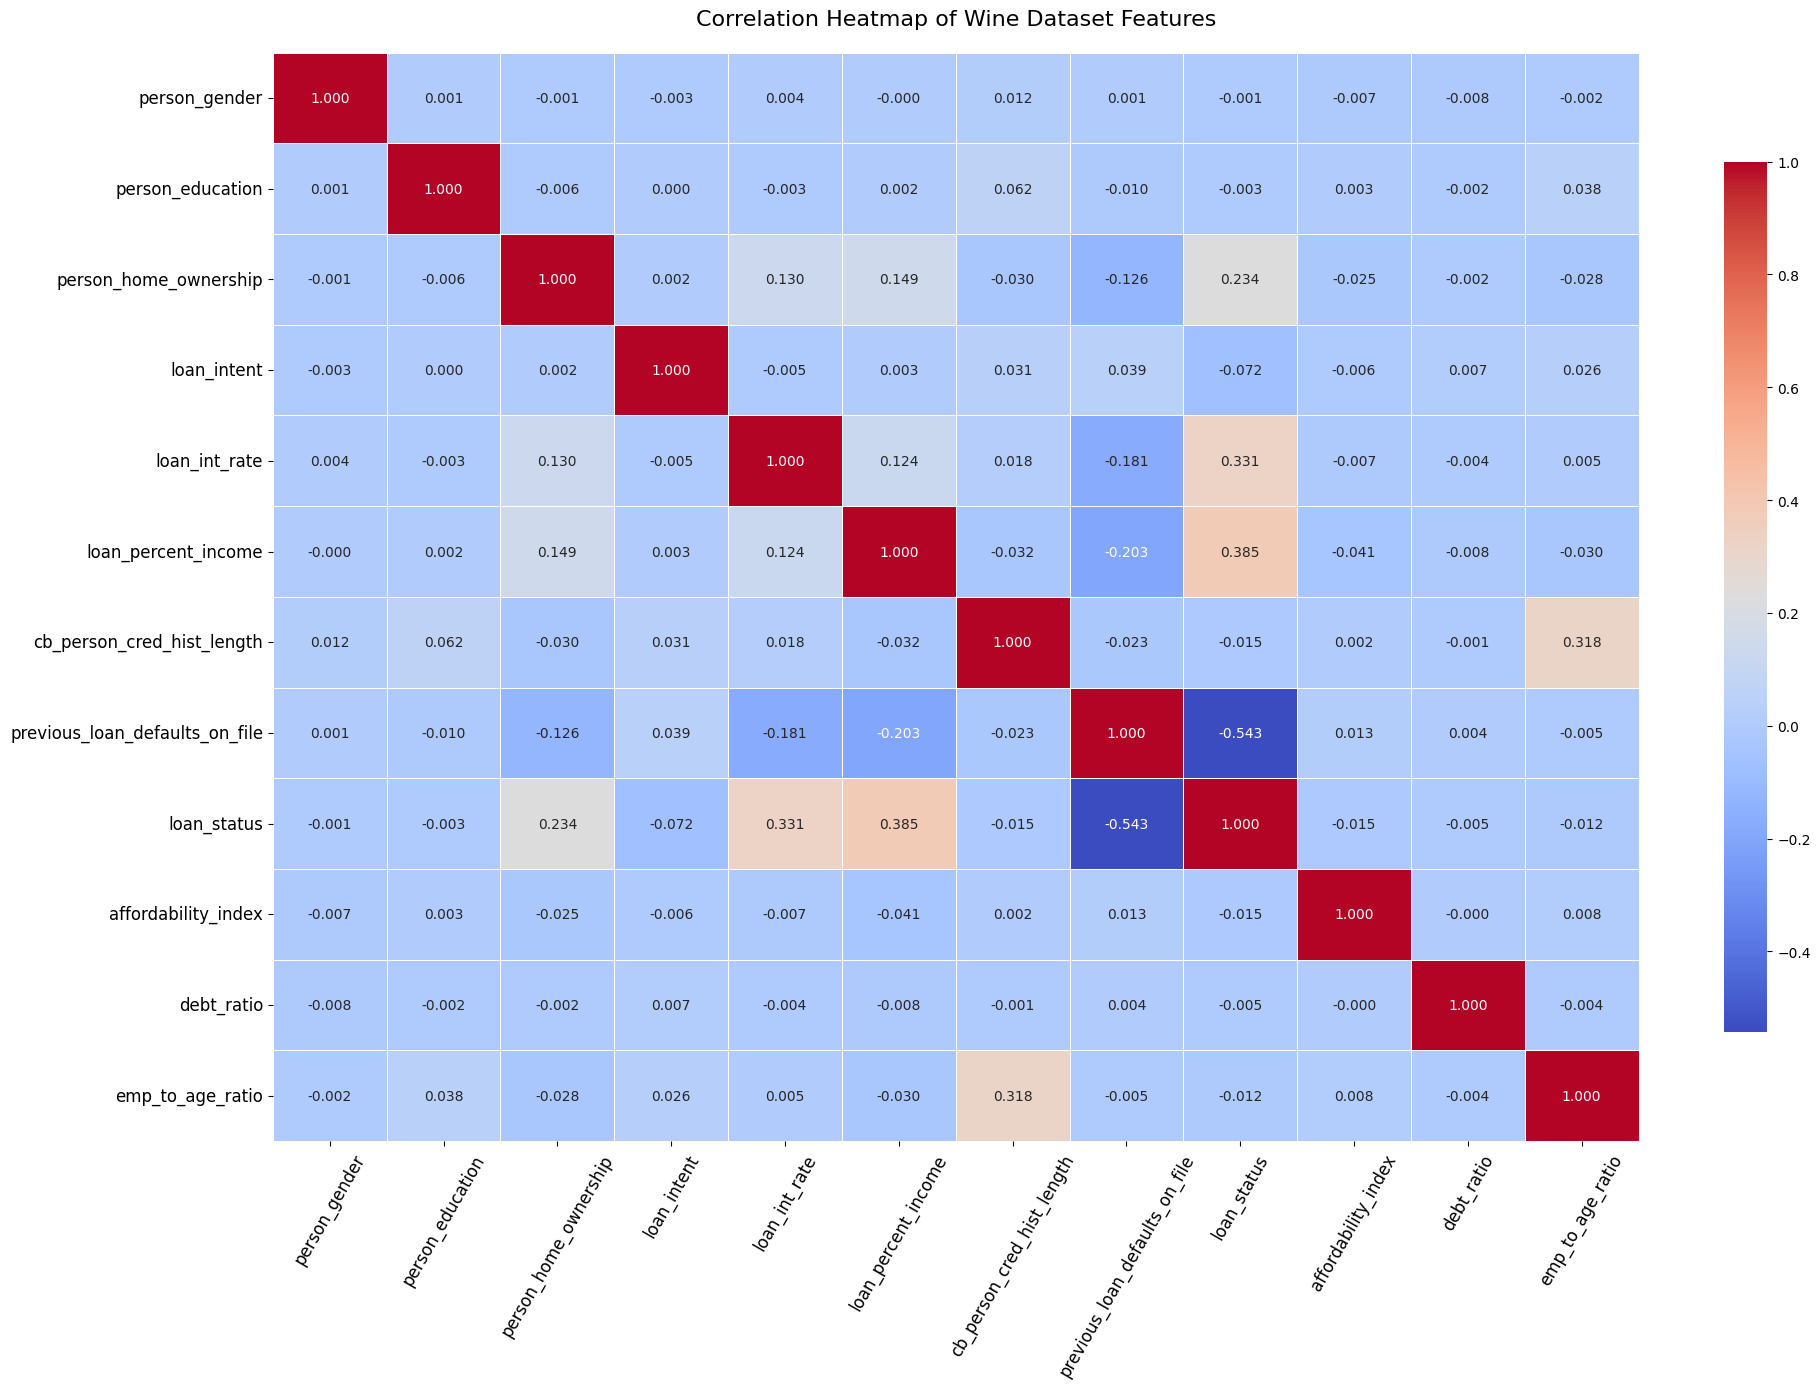

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine


wine_df= data1


wine_corr = wine_df.corr()

# Set up the plot
plt.figure(figsize=(20, 14))
sns.heatmap(
    wine_corr,
    cmap='coolwarm',
    annot=True,
    fmt=".3f",
    linewidths=0.5,
    cbar_kws={'shrink': 0.8}
)


plt.xticks(rotation=60, fontsize=12)
plt.yticks(fontsize=12)


plt.title('Correlation Heatmap of Wine Dataset Features', fontsize=16, pad=20)


plt.tight_layout()
plt.show()


In [ ]:
print( "No Need to drop ")
# Take a minute to find the column where the correlation value is greater than 0.75 at least twice
to_drop = 'person_emp_exp'

# Drop that column from the DataFrame
# data = data.drop(to_drop, axis=1)

No Need to drop 


In [ ]:
data.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22,0,2,71948.0,0.0,3,35000.0,4,16.02,0.49,3.0,561.0,0,1
1,21,0,0,12282.0,0.0,2,1000.0,1,11.14,0.08,2.0,504.0,1,0
2,25,0,0,12438.0,3.0,0,5500.0,3,12.87,0.44,3.0,635.0,0,1
3,23,0,1,79753.0,0.0,3,35000.0,3,15.23,0.44,2.0,675.0,0,1
4,24,1,2,66135.0,1.0,3,35000.0,3,11.01,0.53,4.0,586.0,0,1


Text(0.5, 1.0, 'Feature Correlating witf loan_staus')

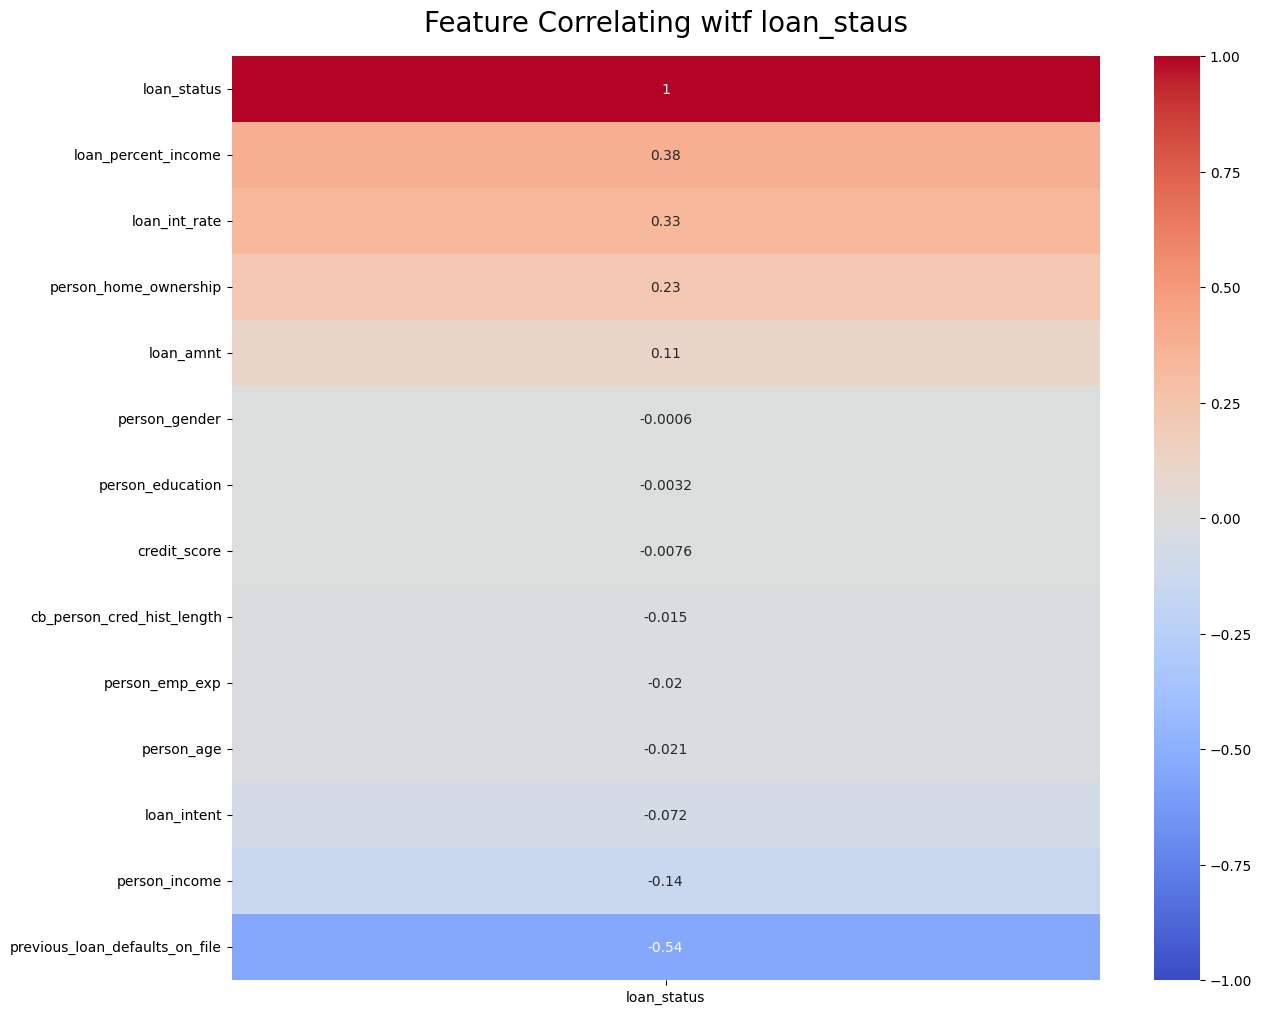

In [ ]:
plt.figure(figsize = (14, 12))
heatmap = sns.heatmap(data.corr()[['loan_status']].sort_values (by = 'loan_status',ascending = False),vmin = -1, vmax = 1, annot = True, cmap = 'coolwarm')
heatmap.set_title('Feature Correlating witf loan_staus', fontdict = {'fontsize':20}, pad =18)

Dataset Splitting

In [ ]:
from sklearn.model_selection import train_test_split

X = data1.drop('loan_status',axis=1)
Y = data1['loan_status']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.30,stratify=Y,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(31497, 11)
(13500, 11)
(31497,)
(13500,)


Model Training & Testing

KNeighborsClassifier

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, Y_train)

Y_pred_knn = knn_model.predict(X_test)
pv2 = knn_model.predict(X_test)
a2=accuracy_score(Y_test, Y_pred_knn)
print("KNN Accuracy:", accuracy_score(Y_test, Y_pred_knn))
print("KNN Classification Report:\n", classification_report(Y_test, Y_pred_knn))
print("KNN Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred_knn))

KNN Accuracy: 0.8658518518518519
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.92     10500
           1       0.75      0.59      0.66      3000

    accuracy                           0.87     13500
   macro avg       0.82      0.77      0.79     13500
weighted avg       0.86      0.87      0.86     13500

KNN Confusion Matrix:
 [[9920  580]
 [1231 1769]]


In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train,Y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
pv1 = lr.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
a1 = accuracy_score(Y_test,pv1)
print('Accuracy Score:',a1)
print('\nConfusion Matrix:\n',confusion_matrix(Y_test,pv1))
print('\nClassification Report:\n',classification_report(Y_test,pv1))

Accuracy Score: 0.8836296296296297

Confusion Matrix:
 [[9776  724]
 [ 847 2153]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.93     10500
           1       0.75      0.72      0.73      3000

    accuracy                           0.88     13500
   macro avg       0.83      0.82      0.83     13500
weighted avg       0.88      0.88      0.88     13500



In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train,Y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
pv3 = lr.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
a3 = accuracy_score(Y_test,pv3)
print('Accuracy Score:',a3)
print('\nConfusion Matrix:\n',confusion_matrix(Y_test,pv3))
print('\nClassification Report:\n',classification_report(Y_test,pv3))

Accuracy Score: 0.8836296296296297

Confusion Matrix:
 [[9776  724]
 [ 847 2153]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.93     10500
           1       0.75      0.72      0.73      3000

    accuracy                           0.88     13500
   macro avg       0.83      0.82      0.83     13500
weighted avg       0.88      0.88      0.88     13500



In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=50, batch_size=32, verbose=1)

test_loss, test_accuracy = model.evaluate(X_test, Y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

Y_pred_nn = (model.predict(X_test) > 0.5).astype("int32")

print("Neural Network Classification Report:\n", classification_report(Y_test, Y_pred_nn))

precision_nn = precision_score(Y_test, Y_pred_nn, average='weighted')
recall_nn = recall_score(Y_test, Y_pred_nn, average='weighted')
confusion_matrix_nn = confusion_matrix(Y_test, Y_pred_nn)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


985/985 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8345 - loss: 0.4469 - val_accuracy: 0.8803 - val_loss: 0.2577
Epoch 2/50
985/985 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8705 - loss: 0.3100 - val_accuracy: 0.8810 - val_loss: 0.2518
Epoch 3/50
985/985 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8819 - loss: 0.2699 - val_accuracy: 0.8873 - val_loss: 0.2501
Epoch 4/50
985/985 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8844 - loss: 0.2560 - val_accuracy: 0.8904 - val_loss: 0.2408
Epoch 5/50
985/985 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8861 - loss: 0.2484 - val_accuracy: 0.8914 - val_loss: 0.2470
Epoch 6/50
985/985 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8897 - loss: 0.2433 - val_accuracy: 0.8957 - val_loss: 0.2308
Epoch 7/50
985/985 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8889 - loss: 0.2431 - val_accuracy: 0.8919 - val_loss: 0.2351
Epoch 8/50
985/985 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8882 - loss: 0.2379 - val_accuracy: 0.8958 - val_

In [ ]:
print(test_accuracy)

0.9008148312568665


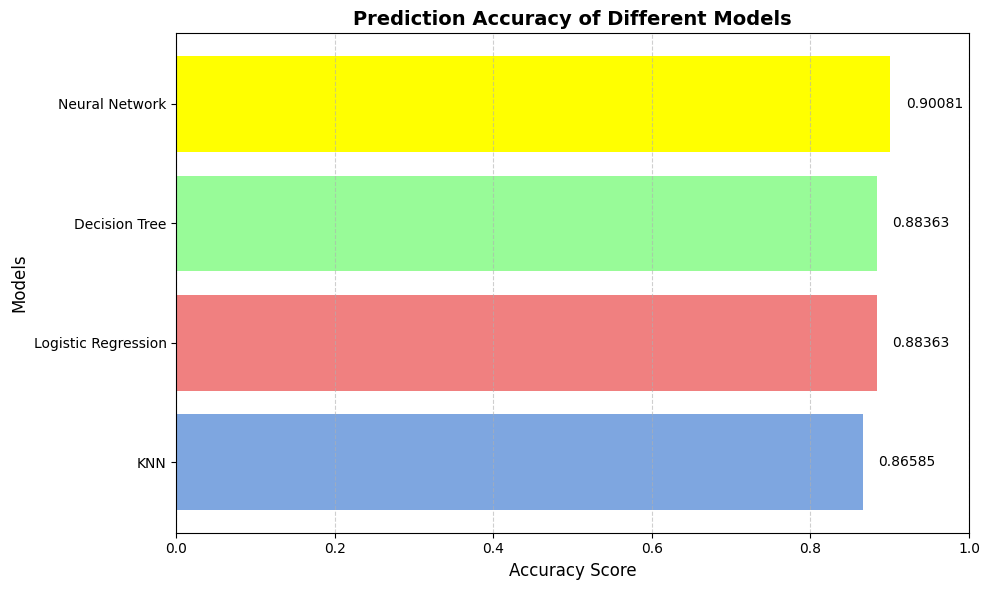

In [ ]:
import matplotlib.pyplot as plt

models = ['KNN', 'Logistic Regression', 'Decision Tree', "Neural Network"]
accuracy_scores = [a2, a1, a3, test_accuracy]

plt.figure(figsize=(10, 6))
plt.barh(models, accuracy_scores, color=['#7EA6E0', '#F08080', '#98FB98', 'yellow'])
plt.xlabel("Accuracy Score", fontsize=12)
plt.ylabel("Models", fontsize=12)
plt.title("Prediction Accuracy of Different Models", fontsize=14, fontweight='bold')
plt.xlim(0, 1)

for i, v in enumerate(accuracy_scores):
    plt.text(v + 0.02, i, f"{v:.5f}", color='black', va='center', fontsize=10)

plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



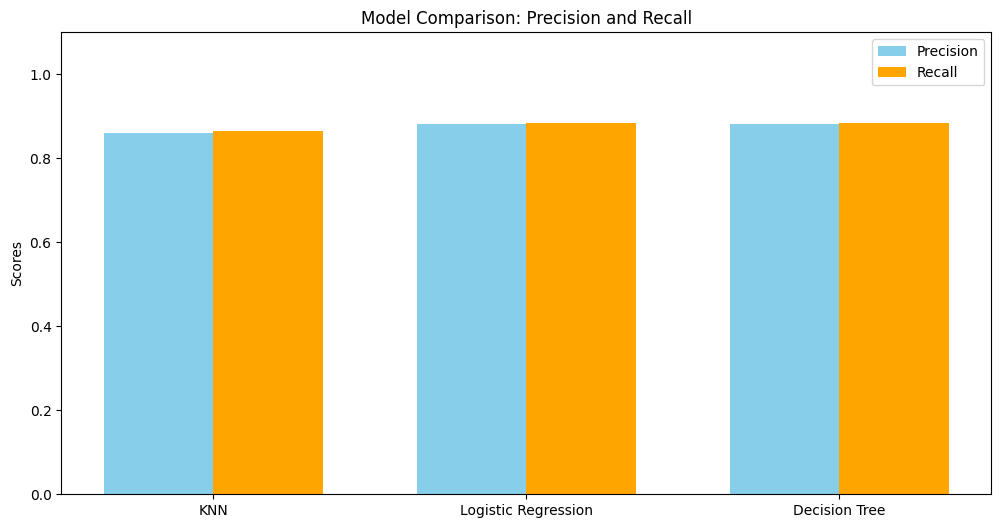

Confusion Matrix for KNN:
               Predicted Positive   Predicted Negative
Actual Positive          9920                 580
Actual Negative          1231                 1769

Confusion Matrix for Logistic Regression:
               Predicted Positive   Predicted Negative
Actual Positive          9776                 724
Actual Negative          847                 2153

Confusion Matrix for Decision Tree:
               Predicted Positive   Predicted Negative
Actual Positive          9776                 724
Actual Negative          847                 2153



In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

precision_knn = precision_score(Y_test, pv2, average='weighted')
recall_knn = recall_score(Y_test, pv2, average='weighted')
confusion_matrix_knn = confusion_matrix(Y_test, pv2)

precision_lr = precision_score(Y_test, pv1, average='weighted')
recall_lr = recall_score(Y_test, pv1, average='weighted')
confusion_matrix_lr = confusion_matrix(Y_test, pv1)

precision_dt = precision_score(Y_test, pv3, average='weighted')
recall_dt = recall_score(Y_test, pv3, average='weighted')
confusion_matrix_dt = confusion_matrix(Y_test, pv3)

models = ['KNN', 'Logistic Regression', 'Decision Tree']
precision_scores = [precision_knn, precision_lr, precision_dt]
recall_scores = [recall_knn, recall_lr, recall_dt]

x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, precision_scores, width, label='Precision', color='skyblue')
rects2 = ax.bar(x + width/2, recall_scores, width, label='Recall', color='orange')

ax.set_ylabel('Scores')
ax.set_title('Model Comparison: Precision and Recall')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

plt.ylim(0, 1.1)

plt.show()

def format_confusion_matrix(cm, model_name):
    formatted = f"Confusion Matrix for {model_name}:\n"
    formatted += f"               Predicted Positive   Predicted Negative\n"
    formatted += f"Actual Positive          {cm[0][0]}                 {cm[0][1]}\n"
    formatted += f"Actual Negative          {cm[1][0]}                 {cm[1][1]}\n"
    return formatted

print(format_confusion_matrix(confusion_matrix_knn, "KNN"))
print(format_confusion_matrix(confusion_matrix_lr, "Logistic Regression"))
print(format_confusion_matrix(confusion_matrix_dt, "Decision Tree"))


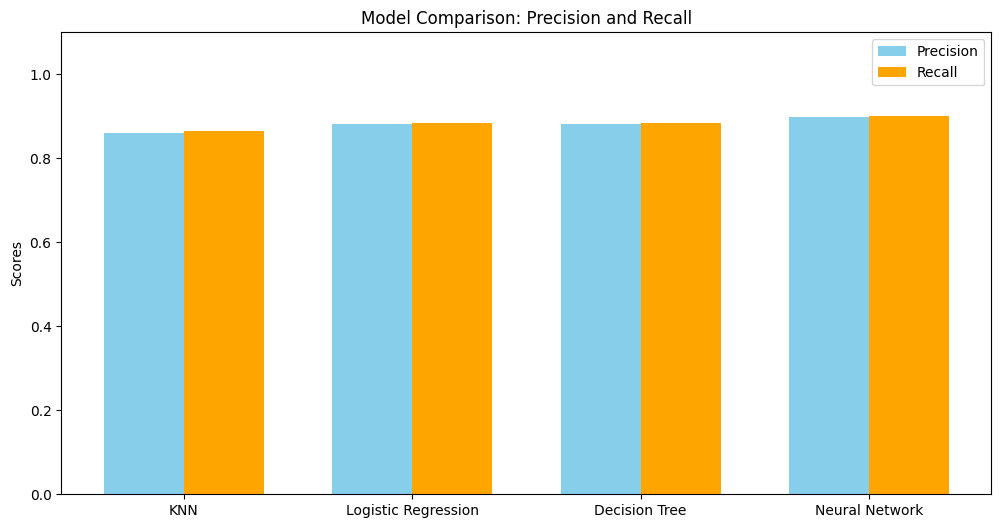

Confusion Matrix for KNN:
               Predicted Positive   Predicted Negative
Actual Positive          9920                 580
Actual Negative          1231                 1769

Confusion Matrix for Logistic Regression:
               Predicted Positive   Predicted Negative
Actual Positive          9776                 724
Actual Negative          847                 2153

Confusion Matrix for Decision Tree:
               Predicted Positive   Predicted Negative
Actual Positive          9776                 724
Actual Negative          847                 2153

Confusion Matrix for Neural Network:
               Predicted Positive   Predicted Negative
Actual Positive          10009                 491
Actual Negative          848                 2152



In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

precision_knn = precision_score(Y_test, pv2, average='weighted')
recall_knn = recall_score(Y_test, pv2, average='weighted')
confusion_matrix_knn = confusion_matrix(Y_test, pv2)

precision_lr = precision_score(Y_test, pv1, average='weighted')
recall_lr = recall_score(Y_test, pv1, average='weighted')
confusion_matrix_lr = confusion_matrix(Y_test, pv1)

precision_dt = precision_score(Y_test, pv3, average='weighted')
recall_dt = recall_score(Y_test, pv3, average='weighted')
confusion_matrix_dt = confusion_matrix(Y_test, pv3)

precision_nn = precision_score(Y_test, Y_pred_nn, average='weighted')
recall_nn = recall_score(Y_test, Y_pred_nn, average='weighted')
confusion_matrix_nn = confusion_matrix(Y_test, Y_pred_nn)

models = ['KNN', 'Logistic Regression', 'Decision Tree', 'Neural Network']
precision_scores = [precision_knn, precision_lr, precision_dt, precision_nn]
recall_scores = [recall_knn, recall_lr, recall_dt, recall_nn]

x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, precision_scores, width, label='Precision', color='skyblue')
rects2 = ax.bar(x + width/2, recall_scores, width, label='Recall', color='orange')

ax.set_ylabel('Scores')
ax.set_title('Model Comparison: Precision and Recall')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

plt.ylim(0, 1.1)

plt.show()

def format_confusion_matrix(cm, model_name):
    formatted = f"Confusion Matrix for {model_name}:\n"
    formatted += f"               Predicted Positive   Predicted Negative\n"
    formatted += f"Actual Positive          {cm[0][0]}                 {cm[0][1]}\n"
    formatted += f"Actual Negative          {cm[1][0]}                 {cm[1][1]}\n"
    return formatted

print(format_confusion_matrix(confusion_matrix_knn, "KNN"))
print(format_confusion_matrix(confusion_matrix_lr, "Logistic Regression"))
print(format_confusion_matrix(confusion_matrix_dt, "Decision Tree"))
print(format_confusion_matrix(confusion_matrix_nn, "Neural Network"))
